In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
 
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Cases\Recency Frequency Monetary\rfm_data_customer.csv', index_col=2)
df.head()

,customer_id,revenue,number_of_orders,recency_days
most_recent_visit,,,,
2006-05-14,22086,777,9,232
2006-09-08,2290,1555,16,115
2006-11-19,26377,336,5,43
2006-10-29,24650,1189,12,64
2006-12-09,12883,1229,12,23


In [17]:
df.index = pd.DatetimeIndex(df.index)

In [18]:
df.drop(['customer_id'], axis=1, inplace=True)

<Figure size 400x400 with 0 Axes>

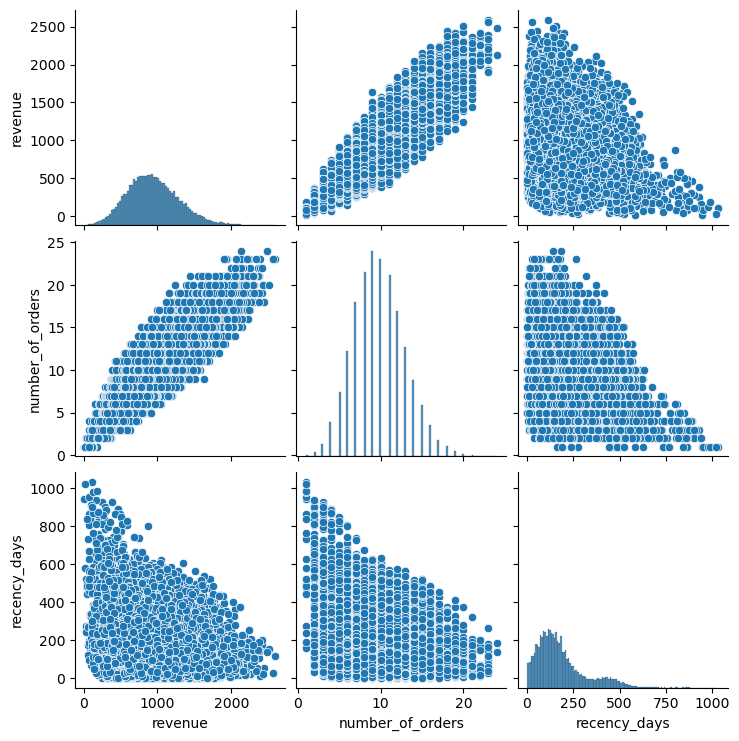

In [19]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df, palette="Set2")
plt.show()

In [20]:
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

In [22]:
scores = []
no_clusters = [2,3,4,5,6]
for i in no_clusters:
    clust = KMeans(
        n_clusters=i,  
    )
    clust.fit(df_scaled.iloc[:, :5])

    scores.append(
        silhouette_score(df_scaled.iloc[:, :5], clust.labels_)
    )

print(scores)

index_max = np.argmax(scores)
best_no_clust = no_clusters[index_max]
print('Best number of clusters', best_no_clust)

[0.3619613512450333, 0.3710220700761777, 0.32308055808376007, 0.2790048412511253, 0.28874748197519456]
Best number of clusters 3


In [31]:
from tqdm import tqdm

scores = []

for i in tqdm(range(2,7)):
    kmeans = KMeans(
        n_clusters=i, 
    )
    kmeans.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, kmeans.labels_))

100%|██████████| 5/5 [01:46<00:00, 21.29s/it]


In [33]:
index_max = np.argmax(scores)
best_no_clust = range(2, 7)[index_max]
print('Best number of clusters', best_no_clust)

Best number of clusters 3


In [34]:
ag_clust = KMeans(
    n_clusters=best_no_clust,      
)

ag_clust.fit(df_scaled)

if best_no_clust > 1:
    print(
        'Silhouette Score:', 
        silhouette_score(df_scaled, ag_clust.labels_)
    )

Silhouette Score: 0.3704411263678348


In [35]:
clust_df = df.copy()
clust_df['Clust'] = ag_clust.labels_
clust_df.groupby('Clust').mean()

,revenue,number_of_orders,recency_days
Clust,,,
0,1285.466449,12.946645,133.281407
1,753.312406,8.264876,135.538668
2,691.410471,7.343755,414.978609
